In [11]:
# Importing necessary libraries for data manipulation, visualization, and word cloud generation

# Import the WordCloud class from the wordcloud library to create word clouds
from wordcloud import WordCloud  

# Import the pandas library as 'pd' for working with data in a tabular format, like data frames
import pandas as pd  

# Import matplotlib.pyplot as 'plt', a library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt  

# Import seaborn as 'sns', a statistical data visualization library that builds on top of matplotlib
import seaborn as sns  

In [13]:
# Specify the path to the CSV file you want to load 
filepath = "C:/Users/subro/Downloads/Indian-Resturants.csv"

# Using pandas to read the CSV file located at the specified file path
# This loads the data into a pandas DataFrame, which is a tabular data structure (like an Excel sheet) with rows and columns
zodata = pd.read_csv(filepath)

In [17]:
# Data Overview:
# Explore the basic characteristics of the dataset, including dimensions, datatypes, and missing values.

# Display concise summary information about the DataFrame
print(zodata.info())
print() # Print a blank line for better readability

# Check for missing (null) values in each column of the DataFrame
print("MISSING VALUES IN EACH COLUMNS")
print(zodata.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [18]:
# During the initial exploration, we identified that the 'zipcode' column may not be essential for our analysis.
# We are removing it because 'zipcode' might not provide meaningful insights in the context of city-wide analysis
# or aggregated data we are working with.

# Drop the 'zipcode' column from the DataFrame
zodata.drop(columns=['zipcode'], inplace=True)

In [19]:
# For each specified city, fill missing (NaN) values in the 'address' column with a default placeholder address

# For rows where the 'city' is 'Bhopal', replace missing 'address' values with 'Unknown Address, Bhopal'
zodata.loc[zodata['city'] == 'Bhopal', 'address'] = zodata.loc[zodata['city'] == 'Bhopal', 'address'].fillna('Unknown Address, Bhopal')

# For rows where the 'city' is 'Hyderabad', replace missing 'address' values with 'Unknown Address, Hyderabad'
zodata.loc[zodata['city'] == 'Hyderabad', 'address'] = zodata.loc[zodata['city'] == 'Hyderabad', 'address'].fillna('Unknown Address, Hyderabad')

# For rows where the 'city' is 'Junagadh', replace missing 'address' values with 'Unknown Address, Junagadh'
zodata.loc[zodata['city'] == 'Junagadh', 'address'] = zodata.loc[zodata['city'] == 'Junagadh', 'address'].fillna('Unknown Address, Junagadh')

# For rows where the 'city' is 'Kharagpur', replace missing 'address' values with 'Unknown Address, Kharagpur'
zodata.loc[zodata['city'] == 'Kharagpur', 'address'] = zodata.loc[zodata['city'] == 'Kharagpur', 'address'].fillna('Unknown Address, Kharagpur')

# For rows where the 'city' is 'Raipur', replace missing 'address' values with 'Unknown Address, Raipur'
zodata.loc[zodata['city'] == 'Raipur', 'address'] = zodata.loc[zodata['city'] == 'Raipur', 'address'].fillna('Unknown Address, Raipur')

# For rows where the 'city' is 'Udaipur', replace missing 'address' values with 'Unknown Address, Udaipur'
zodata.loc[zodata['city'] == 'Udaipur', 'address'] = zodata.loc[zodata['city'] == 'Udaipur', 'address'].fillna('Unknown Address, Udaipur')

In [20]:
# Fill missing (NaN) values in the 'cuisines' column with the string 'Unknown Cuisine'
zodata['cuisines'].fillna('Unknown Cuisine', inplace=True)

# Fill missing (NaN) values in the 'timings' column with the string 'Not available'
zodata['timings'].fillna('Not available', inplace=True)

# Convert the 'opentable_support' column to a string data type
zodata['opentable_support'] = zodata['opentable_support'].astype(str)

# Fill missing (NaN) values in the 'opentable_support' column with the string 'No'
zodata['opentable_support'].fillna('No', inplace=True)

In [21]:
# Check for missing (null) values in each column of the DataFrame
print(zodata.isnull().sum())

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64


C:\Users\subro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


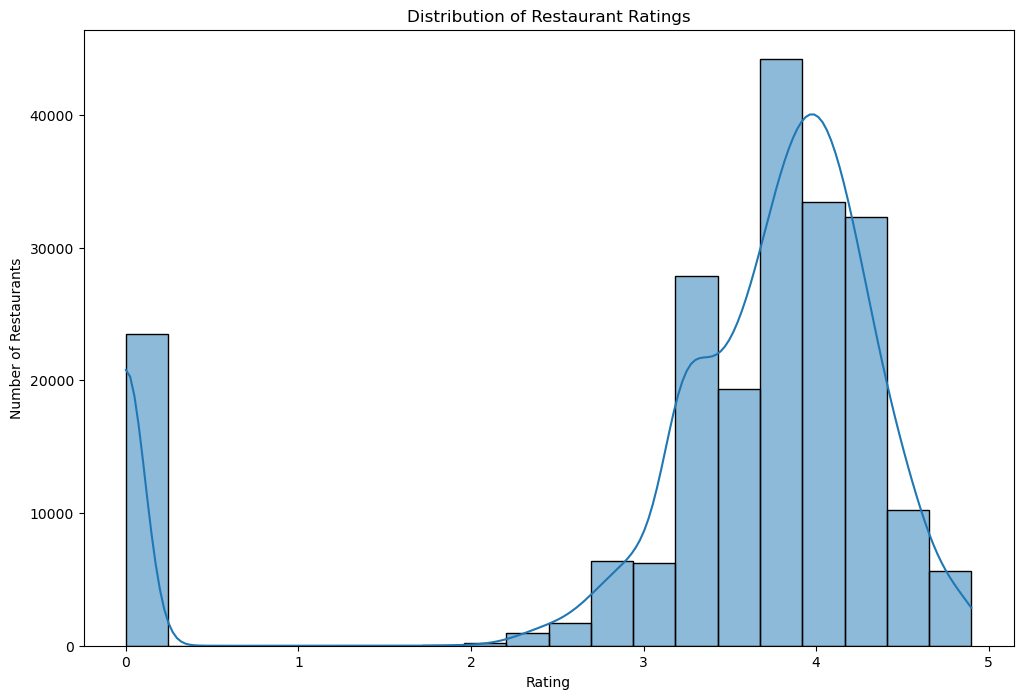

The average rating is 3.3959366625146266


In [22]:
# Basic Statistics:
# Calculate and visualize the average rating of restaurants.
# Analyze the distribution of restaurant ratings to understand the overall rating landscape.

# Calculate the mean (average) of the 'aggregate_rating' column and store it in the variable 'average_rating'
average_rating = zodata['aggregate_rating'].mean()

# Set up the size of the plot (12 units wide by 8 units tall)
plt.figure(figsize=(12, 8))

# Use seaborn's histplot to create a histogram of the 'aggregate_rating' column with 20 bins
# The 'kde=True' adds a Kernel Density Estimate (KDE) curve, showing the data distribution as a smooth line
sns.histplot(zodata['aggregate_rating'], bins=20, kde=True)

# Set the title of the plot
plt.title('Distribution of Restaurant Ratings')

# Label the x-axis as 'Rating'
plt.xlabel('Rating')

# Label the y-axis as 'Number of Restaurants'
plt.ylabel('Number of Restaurants')

# Display the plot
plt.show()

# Print the average rating value with a formatted string
print(f"The average rating is {average_rating}")

City with the highest concentration of restaurants: Chennai



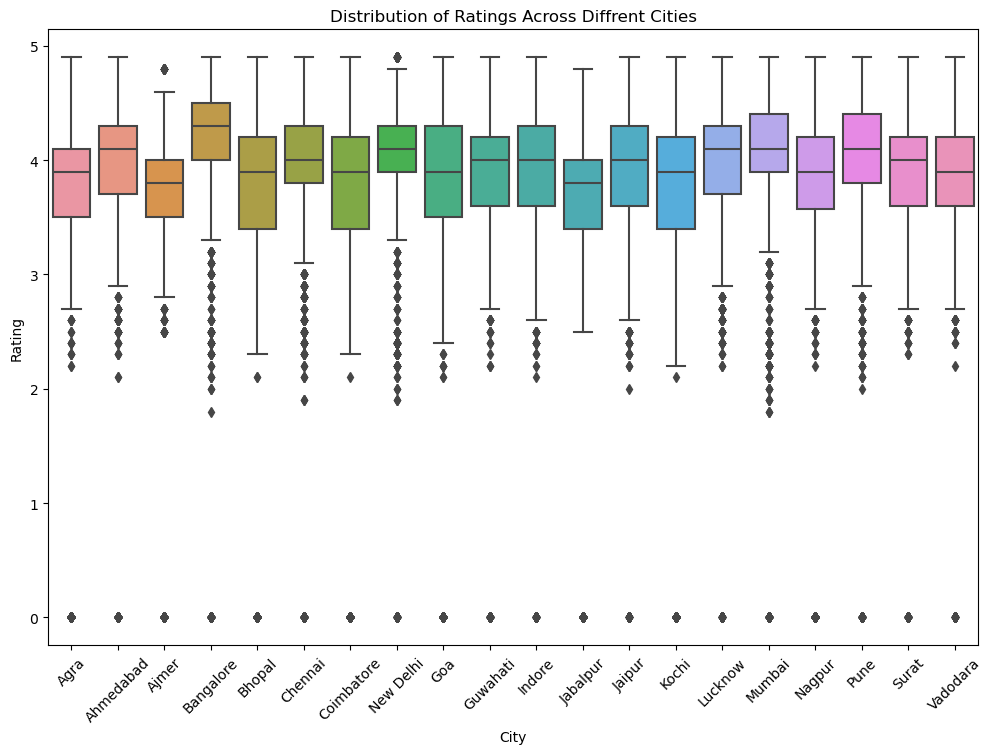

In [38]:
# Location Analysis:
# Identify the city with the highest concentration of restaurants.
# Visualize the distribution of restaurant ratings across different cities.

# Count the number of restaurants in each city and store the result in a Series
city_counts = zodata['city'].value_counts()

# Print the city with the highest concentration of restaurants
print("City with the highest concentration of restaurants:", city_counts.idxmax())
print()  # Print a blank line for better readability

# Create a DataFrame from the city counts and reset the index
city_restaurant_count = zodata['city'].value_counts().reset_index()

# Rename the columns for clarity
city_restaurant_count.columns = ['City', 'No. of Restaurants']

# Select the top 20 cities with the most restaurants
top_cities = city_restaurant_count.head(20)

# Set up the size of the plot (12 units wide by 8 units tall)
plt.figure(figsize=(12, 8))

# Create a boxplot to show the distribution of ratings across the top 20 cities
# Only include rows where the city is in the list of top cities
sns.boxplot(x='city', y='aggregate_rating', data=zodata[zodata['city'].isin(top_cities['City'])])

# Set the title and labels for the plot
plt.title('Distribution of Ratings Across Diffrent Cities')
plt.xlabel('City')
plt.ylabel('Rating')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

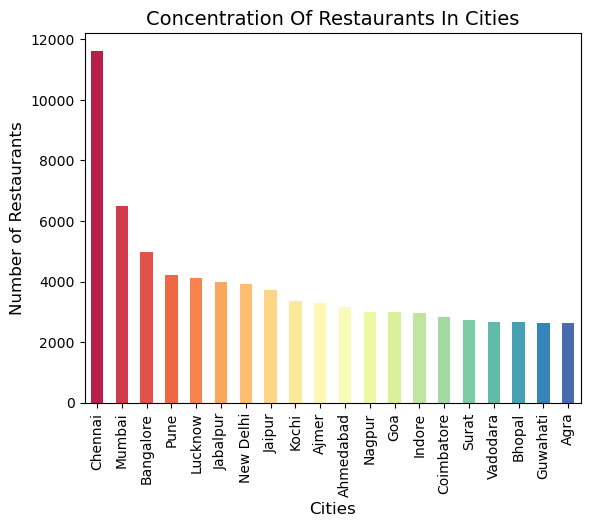

          City  No. of Restaurants
0      Chennai               11630
1       Mumbai                6497
2    Bangalore                4971
3         Pune                4217
4      Lucknow                4121
5     Jabalpur                3994
6    New Delhi                3918
7       Jaipur                3713
8        Kochi                3370
9        Ajmer                3277
10   Ahmedabad                3162
11      Nagpur                2992
12         Goa                2992
13      Indore                2958
14  Coimbatore                2824
15       Surat                2713
16    Vadodara                2678
17      Bhopal                2656
18    Guwahati                2622
19        Agra                2622


In [25]:
# Get the top 20 cities with the highest number of restaurants
city_counts = zodata['city'].value_counts().head(20) 

# Create a bar plot for the top 20 cities
# The colors for the bars are taken from the "Spectral" palette in seaborn, adjusted for the number of cities
city_counts.plot(kind='bar', color=sns.color_palette("Spectral", len(city_counts)))  

# Set the title of the plot with a specified font size
plt.title('Concentration Of Restaurants In Cities', fontsize=14)  

# Label the x-axis with a specified font size
plt.xlabel('Cities', fontsize=12) 

# Label the y-axis with a specified font size
plt.ylabel('Number of Restaurants', fontsize=12)  

# Display the plot
plt.show()  

# Print the DataFrame of top cities with the number of restaurants
print(top_cities)

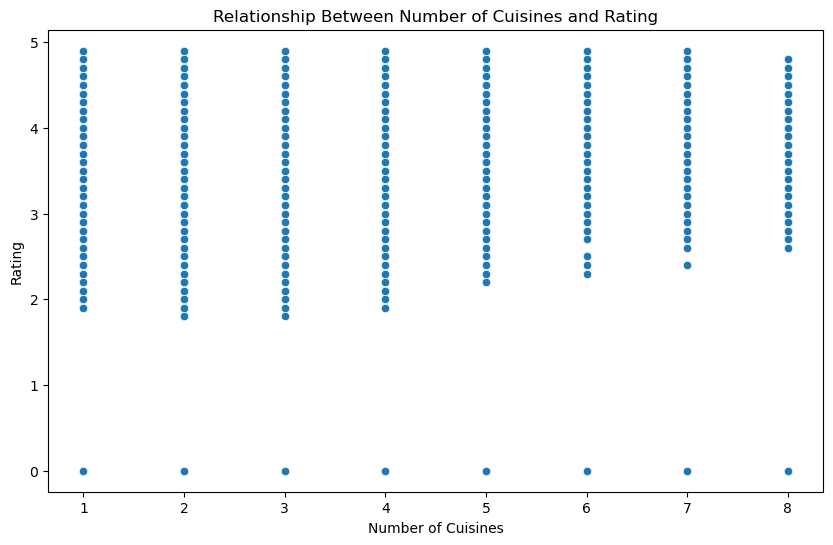

In [26]:
# Cuisine Analysis:
# Determine the most popular cuisines among the listed restaurants.
# Investigate if there's a correlation between the variety of cuisines offered andrestaurant ratings.

# Count the number of restaurants for each unique cuisine and reset the index to create a DataFrame
cuisine_count = zodata['cuisines'].value_counts().reset_index()
cuisine_count.columns = ['Cuisines', 'No. of Restaurants']  # Rename columns for clarity

# Select the top 20 cuisines with the most restaurants
top_cuisines = cuisine_count.head(20)

# Create a new column 'total_cuisines' that counts the number of cuisines in each restaurant
# This uses a lambda function to split the 'cuisines' string by commas and count the resulting items
zodata['total_cuisines'] = zodata['cuisines'].apply(lambda x: len(x.split(',')))

# Set up the size of the scatter plot (10 units wide by 6 units tall)
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the relationship between the number of cuisines and the aggregate rating
sns.scatterplot(x='total_cuisines', y='aggregate_rating', data=zodata)

# Set the title and labels for the plot
plt.title('Relationship Between Number of Cuisines and Rating')
plt.xlabel('Number of Cuisines')
plt.ylabel('Rating')

# Display the plot
plt.show()

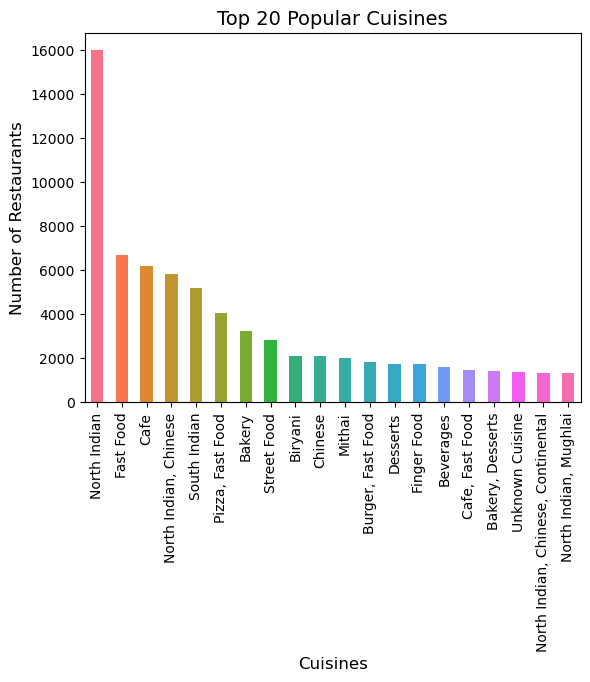

,Cuisines,No. of Restaurants
0,North Indian,15996
1,Fast Food,6721
2,Cafe,6190
3,"North Indian, Chinese",5820
4,South Indian,5217
5,"Pizza, Fast Food",4075
6,Bakery,3238
7,Street Food,2837
8,Biryani,2118
9,Chinese,2116


In [27]:
# Get the counts of the top 20 most popular cuisines based on the number of restaurants
cuisine_counts = zodata['cuisines'].value_counts().head(20) 

# Create a bar plot for the top 20 cuisines
# The colors for the bars are taken from the "husl" palette in seaborn, adjusted for the number of cuisines
cuisine_counts.plot(kind='bar', color=sns.color_palette("husl", len(cuisine_counts)))  

# Set the title of the plot with a specified font size
plt.title('Top 20 Popular Cuisines', fontsize=14)  

# Label the x-axis with a specified font size
plt.xlabel('Cuisines', fontsize=12) 

# Label the y-axis with a specified font size
plt.ylabel('Number of Restaurants', fontsize=12)  

# Display the plot
plt.show()  

# Print the DataFrame of top cuisines (not displayed as part of the plot)
top_cuisines

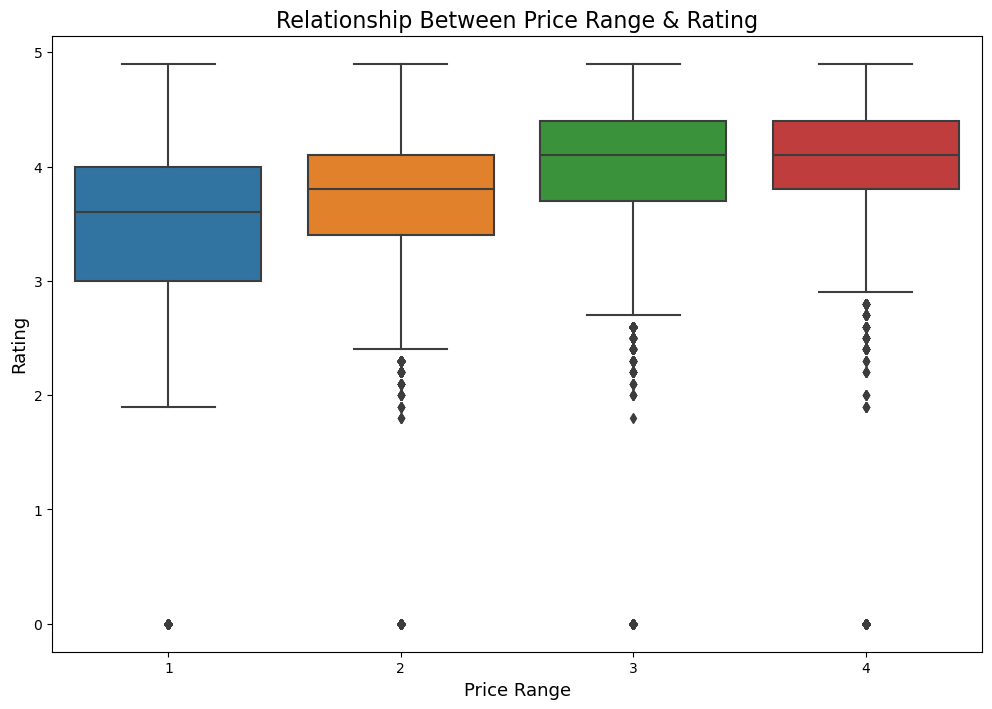

,price_range,average_cost_for_two
0,1,225.265067
1,2,516.288496
2,3,1088.005116
3,4,2215.654482


In [28]:
# Price Range and Rating:
# Analyze the relationship between price range and restaurant ratings.
# Visualize the average cost for two people in different price categories.

# Set up the size of the box plot (12 units wide by 8 units tall)
plt.figure(figsize=(12, 8))

# Create a box plot to visualize the relationship between price range and aggregate rating
sns.boxplot(x='price_range', y='aggregate_rating', data=zodata)

# Set the title and labels for the plot with specified font sizes
plt.title('Relationship Between Price Range & Rating', fontsize=16)
plt.xlabel('Price Range', fontsize=13)
plt.ylabel('Rating', fontsize=13)

# Display the plot
plt.show()

# Calculate the average cost for two people grouped by price range and reset the index
average_cost_by_price_range = zodata.groupby('price_range')['average_cost_for_two'].mean().reset_index()

# Display the DataFrame with average cost by price range
average_cost_by_price_range

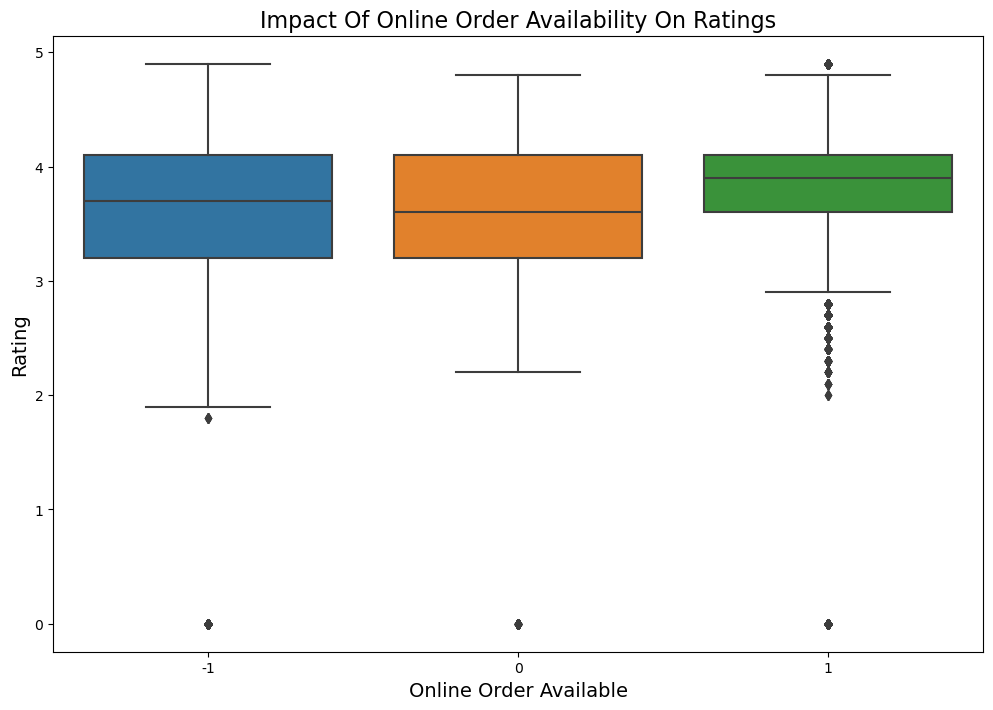

,Opentable_support,Count
0,0.0,211896


In [29]:
# Online Order and Table Booking:
# Investigate the impact of online order availability on restaurant ratings.
# Analyze the distribution of restaurants that offer table booking.

# Convert the 'opentable_support' column to a float data type
zodata['opentable_support'] = zodata['opentable_support'].astype(float)

# Set up the size of the box plot (12 units wide by 8 units tall)
plt.figure(figsize=(12, 8))

# Create a box plot to visualize the relationship between online order availability and aggregate rating
sns.boxplot(x='delivery', y='aggregate_rating', data=zodata)

# Set the title and labels for the plot with specified font sizes
plt.title('Impact Of Online Order Availability On Ratings', fontsize=16)
plt.xlabel('Online Order Available', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Display the plot
plt.show()

# Count the occurrences of each unique value in the 'opentable_support' column
table_booking_count = zodata['opentable_support'].value_counts().reset_index()
table_booking_count.columns = ['Opentable_support', 'Count']

# Display the DataFrame with counts of opentable support
table_booking_count

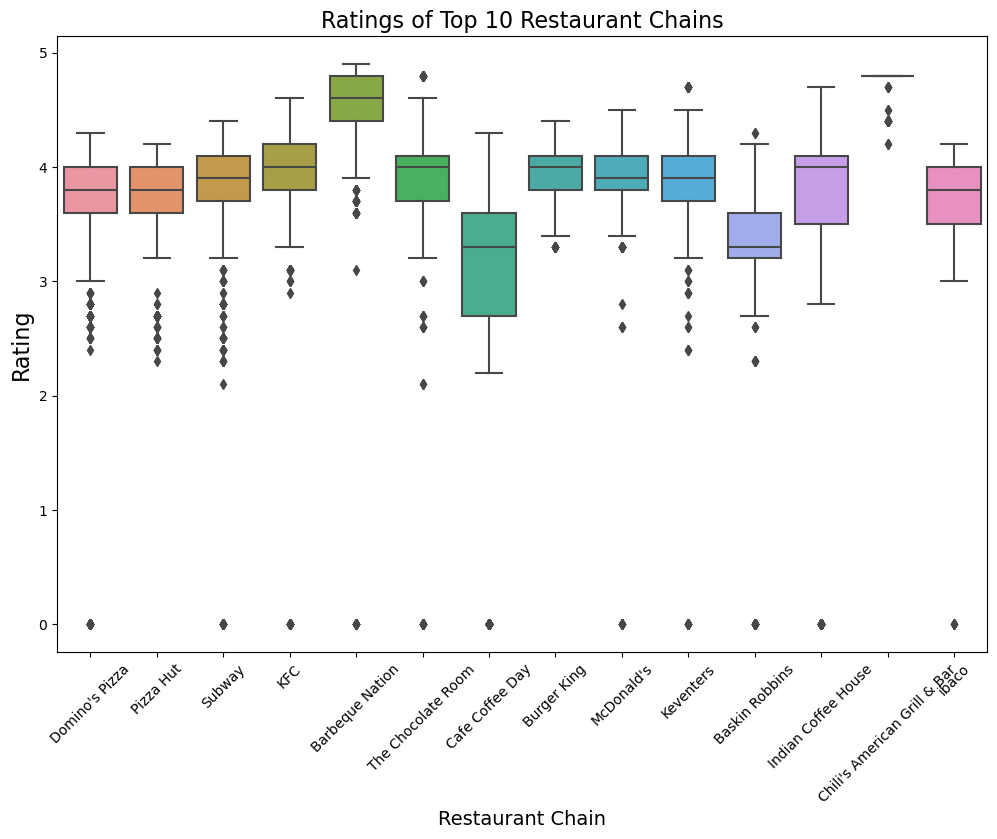

In [30]:
# Top Restaurant Chains:
# Identify and visualize the top restaurant chains based on the number of outlets.
# Explore the ratings of these top chains.

# Count the number of outlets for each restaurant name and reset the index to create a DataFrame
restaurant_chain_count = zodata['name'].value_counts().reset_index()
restaurant_chain_count.columns = ['Restaurant_Chains', 'Outlets']  # Rename columns for clarity

# Select the top 14 restaurant chains based on the number of outlets
top_restaurant_chains = restaurant_chain_count.head(14)

# Set up the size of the box plot (12 units wide by 8 units tall)
plt.figure(figsize=(12, 8))

# Create a box plot to visualize the ratings of the top restaurant chains
# Filter the data to include only those chains in the top_restaurant_chains DataFrame
sns.boxplot(x='name', y='aggregate_rating', data=zodata[zodata['name'].isin(top_restaurant_chains['Restaurant_Chains'])])

# Set the title and labels for the plot with specified font sizes
plt.title('Ratings of Top 10 Restaurant Chains', fontsize=16)
plt.xlabel('Restaurant Chain', fontsize=14)
plt.ylabel('Rating', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

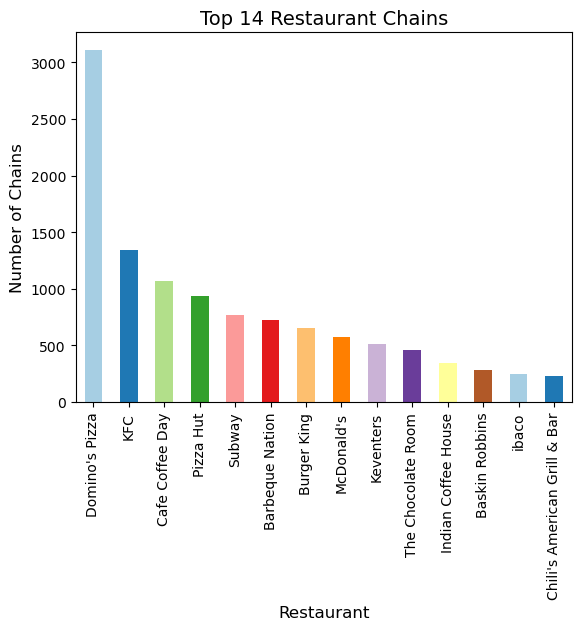

,Restaurant_Chains,Outlets
0,Domino's Pizza,3108
1,KFC,1343
2,Cafe Coffee Day,1068
3,Pizza Hut,936
4,Subway,766
5,Barbeque Nation,725
6,Burger King,658
7,McDonald's,578
8,Keventers,512
9,The Chocolate Room,461


In [31]:
# Get the counts of the top 14 restaurant chains based on the number of outlets
restaurant_chain_count = zodata['name'].value_counts().head(14)

# Create a bar plot for the top 14 restaurant chains
# The colors for the bars are taken from the "Paired" palette in seaborn, adjusted for the number of chains
restaurant_chain_count.plot(kind='bar', color=sns.color_palette("Paired", len(restaurant_chain_count)))  

# Set the title of the plot with a specified font size
plt.title('Top 14 Restaurant Chains', fontsize=14)  

# Label the x-axis with a specified font size
plt.xlabel('Restaurant', fontsize=12) 

# Label the y-axis with a specified font size
plt.ylabel('Number of Chains', fontsize=12)  

# Display the plot
plt.show()  

# Display the DataFrame of top restaurant chains (not displayed as part of the plot)
top_restaurant_chains

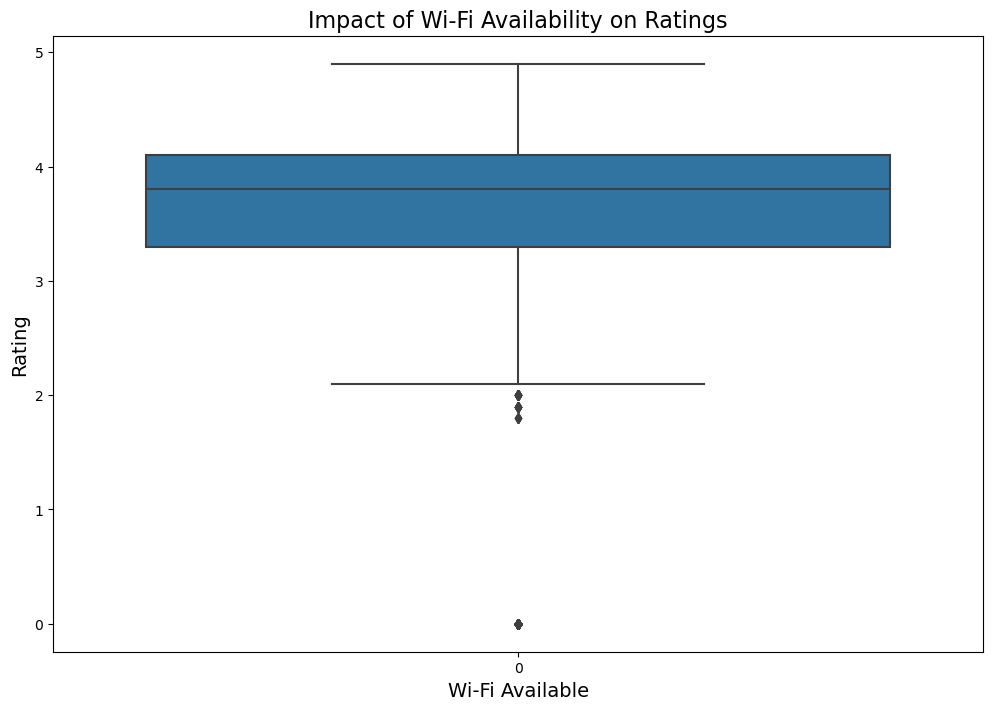

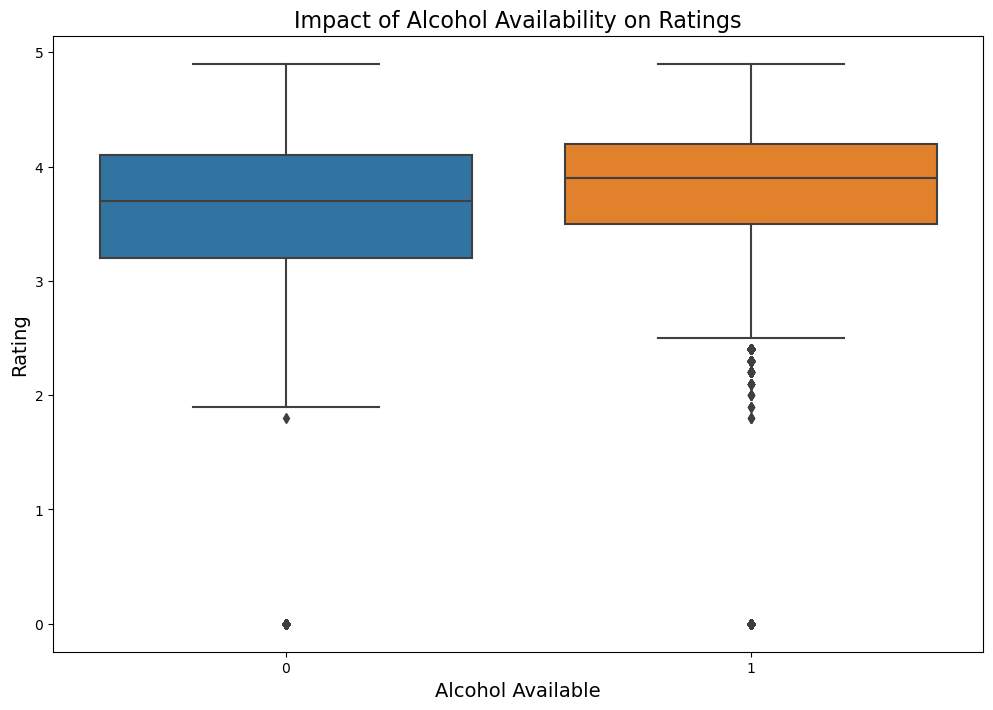

In [32]:
# Restaurant Features:
# Analyze the distribution of restaurants based on features like Wi-Fi, Alcoholavailability, etc.
# Investigate if the presence of certain features correlates with higher ratings.

# Create a new column 'has_wifi' to indicate Wi-Fi availability
# It assigns 1 if 'Wi-Fi' is found in the 'highlights' column, otherwise assigns 0
zodata['has_wifi'] = zodata['highlights'].apply(lambda x: 1 if 'Wi-Fi' in x else 0)

# Create a new column 'has_alcohol' to indicate alcohol availability
# It assigns 1 if 'Alcohol' is found in the 'highlights' column, otherwise assigns 0
zodata['has_alcohol'] = zodata['highlights'].apply(lambda x: 1 if 'Alcohol' in x else 0)

# Set up the size of the box plot for Wi-Fi availability (12 units wide by 8 units tall)
plt.figure(figsize=(12, 8))
# Create a box plot to visualize the relationship between Wi-Fi availability and aggregate rating
sns.boxplot(x='has_wifi', y='aggregate_rating', data=zodata)
# Set the title and labels for the plot with specified font sizes
plt.title('Impact of Wi-Fi Availability on Ratings', fontsize=16)
plt.xlabel('Wi-Fi Available', fontsize=14)
plt.ylabel('Rating', fontsize=14)
# Display the plot
plt.show()

# Set up the size of the box plot for alcohol availability (12 units wide by 8 units tall)
plt.figure(figsize=(12, 8))
# Create a box plot to visualize the relationship between alcohol availability and aggregate rating
sns.boxplot(x='has_alcohol', y='aggregate_rating', data=zodata)
# Set the title and labels for the plot with specified font sizes
plt.title('Impact of Alcohol Availability on Ratings', fontsize=16)
plt.xlabel('Alcohol Available', fontsize=14)
plt.ylabel('Rating', fontsize=14)
# Display the plot
plt.show()

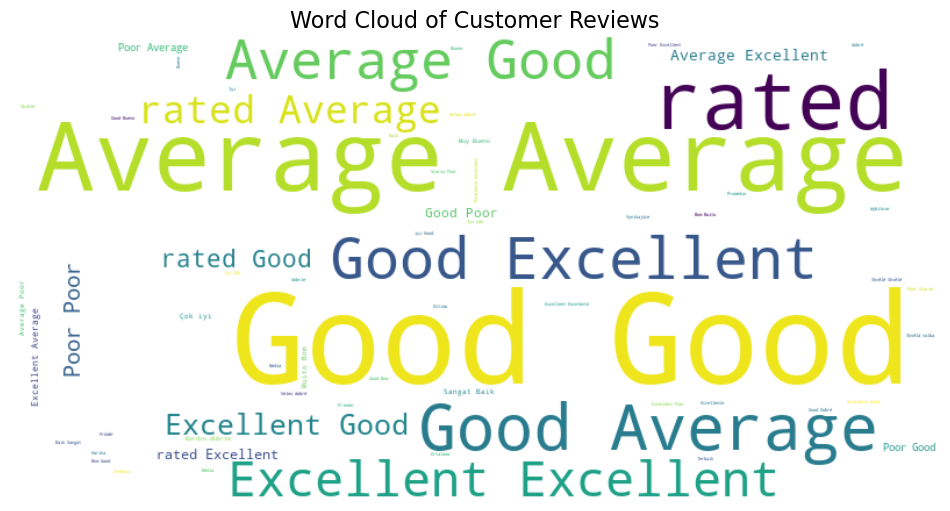

In [33]:
# Word Cloud for Reviews:
# Create a word cloud based on customer reviews to identify common positiveand negative sentiments.
# Analyze frequently mentioned words and sentiments.

# Combine all non-null customer review texts into a single string
text = ' '.join(zodata['rating_text'].dropna().tolist())

# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Set up the size of the plot (12 units wide by 8 units tall)
plt.figure(figsize=(12, 8))

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
# Hide the axis for better visualization
plt.axis('off')

# Set the title of the plot with a specified font size
plt.title('Word Cloud of Customer Reviews', fontsize=16)

# Display the plot
plt.show()

# Seasonal Trends:
# Explore if there are any seasonal trends in restaurant ratings or user reviews.
# Visualize the distribution of ratings during different times of the year.

"""
"Unfortunately, the dataset provided does not contain date or time-related information that would allow us to analyze seasonal trends in restaurant ratings or user reviews. To explore seasonal patterns, we would need data that includes:

The date or time of reviews or ratings.
Information about specific months or seasons (e.g., summer, winter).
Without this data, it is not feasible to determine whether restaurant ratings fluctuate across different times of the year."
"""

In [36]:
# Conclusion:
# Summarize the key findings and insights obtained from the analysis

print("Key Findings:")
print("1. City with the highest concentration of restaurants:", city_counts.idxmax())
print("3. Popular cuisines include:\n", cuisine_counts.index.tolist())

Key Findings:
1. City with the highest concentration of restaurants: Chennai
3. Popular cuisines include:
 ['North Indian', 'Fast Food', 'Cafe', 'North Indian, Chinese', 'South Indian', 'Pizza, Fast Food', 'Bakery', 'Street Food', 'Biryani', 'Chinese', 'Mithai', 'Burger, Fast Food', 'Desserts', 'Finger Food', 'Beverages', 'Cafe, Fast Food', 'Bakery, Desserts', 'Unknown Cuisine', 'North Indian, Chinese, Continental', 'North Indian, Mughlai']


In [39]:
# Group the data by city and calculate the mean aggregate rating for each city
city_avg_rating = zodata.groupby('city')['aggregate_rating'].mean()

# Print the average ratings for each city, sorted in descending order
print(city_avg_rating.sort_values(ascending=False))

# Group and sort the average ratings again
city_avg_rating = zodata.groupby('city')['aggregate_rating'].mean()
sorted_ratings = city_avg_rating.sort_values(ascending=False)



city
Bangalore       4.073567
Gurgaon         4.048837
Hyderabad       4.042747
Secunderabad    4.018579
Mumbai          4.004848
                  ...   
Pushkar         1.249174
Darjeeling      1.141116
Kharagpur       0.963740
Alappuzha       0.858842
Palakkad        0.785235
Name: aggregate_rating, Length: 99, dtype: float64
